<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Matthew, my name is Dmitrii. Happy to review your project! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall well done! I can see that a lot of effort has been made! Your project already looks really good, and you accomplished impressive results.

However, there are some comments/areas left to fix that will help you to make your project even better:

- Update graphs.
- Update hypotheses and conclusions based on the results. 
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Thank you for submitting your project with all your comments, insights and improvements! 

There are no critical issues left, so your project has been accepted. Wish you cool projects in the next sprints 🍀

PS: As a last thing, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo 🙌
</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

**Project Objective:**

We will be analyzing a relatively small sample of data of 500 Megaline clients to look at their behavior, and the differences that come from users of the two different plans compared to one another, along with looking into differences between users from different geographical regions.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and tasks.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
import numpy as np
from decimal import Decimal as decimal

## Load data

In [2]:
# Load the data files into different DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')

internet_df = pd.read_csv('/datasets/megaline_internet.csv')

messages_df = pd.read_csv('/datasets/megaline_messages.csv')

plans_df = pd.read_csv('/datasets/megaline_plans.csv')

users_df = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
display(plans_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

In [4]:
# Print a sample of data for plans
display(plans_df.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The plans dataframe seems to be without great issue - one addition that will be made will be to convert the `mb_per_month_included` into a seperate column to be represented in gb as that is how the plan is both phrased outside of analysis, and how customers are charged for data use.

## Fix data

There are no obvious issues with the initial observation, because there are only two rows that can be fully observed, there is no need to check for duplicates as the rows are unique.

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [5]:
gb = [15, 30]
plans_df['gb_per_month_included'] = gb
plans_df = plans_df.iloc[:, [7, 3, 2, 6, 0, 5, 1, 8, 4]]
display(plans_df.head())

,plan_name,usd_monthly_pay,minutes_included,usd_per_minute,messages_included,usd_per_message,mb_per_month_included,gb_per_month_included,usd_per_gb
0,surf,20,500,0.03,50,0.03,15360,15,10
1,ultimate,70,3000,0.01,1000,0.01,30720,30,7


GB per month column has been added, and the table reordered to be more logically ordered with the price for overagees to be immediately after the included amounts. 

Including the GB per month column isn't necessary as we could divide the MB per month column by 1024 for any calculations, however, having the GB seperate may allow less repeated calculations during the analysis of billing/revenue data.

## Users

In [6]:
# Print the general/summary information about the users' DataFrame
display(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [7]:
# Print a sample of data for users
display(users_df.head(10))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


The largest issue that will be corrected will be converting the dates in `reg_date` and `churn_date` to the timestamp data type rather than keeping them as objects - this will aid in any time based analysis that needs to be carried out. Another concern was that `user_id` is an integer, however in the sample we can see that the IDs start at 1000 and the info table tells us that there are only 500 users represented, therefore, the concern that IDs starting with zeros (0) have been adjusted upon import is not an issue.

### Fix Data

In [8]:
users_df.duplicated().sum() # Checking for duplicate rows

0

There are no dulpicates in the table.

In [9]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')
display(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

Dates have been converted to the proper data type for future calculations.

### Enrich Data

The data frame contains all that it needs to at this point. Any task-specific alterations will occur later.

## Calls

In [10]:
# Print the general/summary information about the calls' DataFrame
display(calls_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

In [11]:
# Print a sample of data for calls
display(calls_df.head(10))

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


There is no missing data in the Calls data, however, the duration of the calls are represented as floating-point numbers (in minutes according the the description of the data). Because calls are rounded up to the nearest minutes for billing purposes, we will do the same in an additional column and convert them to integers for less bulk afterwards while retaining all of the original data.

### Fix data

In [12]:
calls_df.duplicated().sum() # Checking for duplicate rows

0

There are no duplicates in this table.

In [13]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
display(calls_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


None

Dates have been converted to the proper data type for future calculations.

### Enrich data

In [14]:
calls_df['billable'] = calls_df['duration'].apply(np.ceil).astype('int')
display(calls_df.head(10))
display(calls_df.info())

,id,user_id,call_date,duration,billable
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5
5,1000_388,1000,2018-12-31,2.20,3
6,1000_510,1000,2018-12-27,5.75,6
7,1000_521,1000,2018-12-28,14.18,15
8,1000_530,1000,2018-12-28,5.77,6
9,1000_544,1000,2018-12-26,4.40,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   billable   137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


None

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Ok, great job! Good that you did not forget about data rounding. Also, great choice of np.ceil () method :)

Also, you can apply this method directly to the column in your data in the following way:

```
calls['duration'] = np.ceil(calls['duration'])
```

The column `billable` has been added as rounded up values of the `duration` column to reflect each call being rounded up to the minute for billing purposes. The data in the column was also converted to the integer data type for lower storage.

## Messages

In [15]:
# Print the general/summary information about the messages' DataFrame
display(messages_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

In [16]:
# Print a sample of data for messages
display(messages_df.head(10))

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Like in the calls record, there is no missing data. However, like in Users, the dates are represented as objects, so we will again convert them into the timestamp datatype for ease of use.

### Fix data

In [17]:
messages_df.duplicated().sum() # Checking for duplicate rows

0

There are no duplicates in this table.

In [18]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')
display(messages_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


None

Dates have been converted to the proper data type for future time based analysis.

### Enrich data

The data is sufficient at this time - in the future we will create a seperate DataFrame to give a count of messages per month per user to better analyze trends and gather billing information.

## Internet

In [19]:
# Print the general/summary information about the internet DataFrame
display(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

In [20]:
# Print a sample of data for the internet traffic
display(internet_df.head(10))

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Like the previous tables that contained dates, we will be converting that of the Internet data to be timestamp data type in order to analyze it more easily.

### Fix data

In [21]:
internet_df.duplicated().sum() # Checking for duplicate rows

0

There are no duplicates in this table.

In [22]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
display(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

Dates have been converted to the proper data type for future time-based calculations.

### Enrich data

Unlike with calls, internet usage is cumulative over the span of the month, only then is it rounded up to GB for billing purposes. Only when we gather the monthly usage for each user will we do rounding of internet usage.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Good start and first view on data! 

## Study plan conditions

In [23]:
# Print out the plan conditions and make sure they are clear for you
(plans_df.head())

,plan_name,usd_monthly_pay,minutes_included,usd_per_minute,messages_included,usd_per_message,mb_per_month_included,gb_per_month_included,usd_per_gb
0,surf,20,500,0.03,50,0.03,15360,15,10
1,ultimate,70,3000,0.01,1000,0.01,30720,30,7


## Aggregate data per user


In [24]:
# Calculate the number of calls made by each user per month. Save the result.
calls_monthly = calls_df.groupby(by=['user_id', calls_df.call_date.dt.month])['billable'].count()
calls_monthly = calls_monthly.reset_index(name='calls_count')
calls_monthly.rename(columns = {'call_date': 'month'}, inplace=True)
display(calls_monthly.head())

,user_id,month,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
In pivot_table or groupby it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:

    data_calls.groupby(['user_id','month']).agg({'duration' : ('count','sum')}).reset_index()
    
or
    
    data_calls.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('count','sum')).reset_index()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Everything is correct here but usually, it is always helpful to double-check whether we indeed have data within one year/time period. If not then selecting and aggregating data by the month number will cause an issue. So here it is safer to use datetime64[M] which provides a complete date. 

<div class="alert alert-info"> <b>Student comments:</b> 
    
A pivot table here does make a lot of sense. I need to use them more to get used to them (an intend on doing so as they are very useful) - it is certainly more efficient code.

And I was only as confident breaking it into months as early as I did because of some of the comments in the sprint channel for Slack. Real world break down would likely require each user's month to start on a different date, which would make defining the monthly usage and charges for each client more complex, and it would require a little more finesse than just screwing with the months this early. But due to the comments, I was relatively confident that breaking it down by pure month would be alright for the application of things in this project.</div>  

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
It our case that is indeed correct just to take month from the date; however, on the real data I can advise always check available date period.

A data frame has been created of the count of calls made per user ID per month.

In [25]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_monthly = calls_df.groupby(by=['user_id', calls_df.call_date.dt.month])['billable'].sum()
minutes_monthly = minutes_monthly.reset_index(name='call_minutes')
minutes_monthly.rename(columns = {'call_date': 'month'}, inplace=True)
display(minutes_monthly.head())

,user_id,month,call_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


A data frame has been created, summing the billable minutes (those that were previously rounded up in line with Megaline's method of counting minutes per call, and organizing them per user ID per month.

In [26]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_monthly = messages_df.groupby(by=['user_id', messages_df.message_date.dt.month])['id'].count()
messages_monthly = messages_monthly.reset_index(name='message_count')
messages_monthly.rename(columns = {'message_date': 'month'}, inplace=True)
display(messages_monthly.head())

,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


A data frame has been made, taking the count of messages per user ID per month.

In [27]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_monthly = internet_df.groupby(by=['user_id', internet_df.session_date.dt.month])['mb_used'].sum()
internet_monthly = internet_monthly.reset_index(name='mb_used')
internet_monthly.rename(columns = {'session_date': 'month'}, inplace=True)
display(internet_monthly.head())

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


A data frame has been created, summing the total internet usage in megabytes per user per month.

In [28]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
user_usage = calls_monthly.merge(minutes_monthly, how='outer')
user_usage = user_usage.merge(messages_monthly, how='outer')
user_usage = user_usage.merge(internet_monthly, how='outer')
display(user_usage.head(10))
display(user_usage.info())

,user_id,month,calls_count,call_minutes,message_count,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
5,1001,12,56.0,412.0,44.0,19369.18
6,1002,10,11.0,59.0,15.0,6552.01
7,1002,11,55.0,386.0,32.0,19345.08
8,1002,12,47.0,384.0,41.0,14396.24
9,1003,12,149.0,1104.0,50.0,27044.14


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   int64  
 1   month          2293 non-null   int64  
 2   calls_count    2258 non-null   float64
 3   call_minutes   2258 non-null   float64
 4   message_count  1806 non-null   float64
 5   mb_used        2277 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 125.4 KB


None

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed `how = 'outer'` can be used here to prevent data loss.
    
By the way, it is also possible to group 3 tables at once using reduce. You can read about it here: https://www.codegrepper.com/code-examples/python/merge+more+than+2+dataframes+in+pandas

<div class="alert alert-info"> <b>Student comments:</b> 
    
Thanks for the tip! I'll look into reduce. I actually messed around with merge to see if I could get it to merge on one line of code, but I opted for my method after I didn't do it. Granted, it was more experimenting with code than actually looking up a way to do it, but having it confirmed there is a way is fantastic.</div> 

Based on the info for the new `user_usage` table which combines the usage per month by the user ID, there are missing values in some of the columns, which is likely representative of no use in that respective column.

In [29]:
# Checking each column individually for missing values - removed the display from them as the other columns were being observed in the process
user_usage[user_usage['user_id'].isna()]
user_usage[user_usage['month'].isna()]
user_usage[user_usage['calls_count'].isna()]
user_usage[user_usage['call_minutes'].isna()]
user_usage[user_usage['message_count'].isna()]
user_usage[user_usage['mb_used'].isna()]
# Checking all the columns that contained missing values to see if all of them had missing values, indicating rows that could possibly be dropped
display(user_usage[(user_usage['calls_count'].isna() & user_usage['call_minutes'].isna() & user_usage['message_count'].isna() & user_usage['mb_used'].isna())])

,user_id,month,calls_count,call_minutes,message_count,mb_used


I looked at each of the colums for their missing data (I am only displaying the last result to reduce clutter), and there was nothing missing in the `user_id` or `month` columns.  Each observation of the others showed that there was data stored in at least one other column indicating some usage. I then checked for rows were there was missing data for all types of usage and found none. This supports the previous conclusion that there were months were some users only used some of their calls, texts, or internet without using others. The remedy to deal with these missing values is to replace them in each of these columns with zeros (0) indicating no usage rather than skewing the data and filling them with the mean or median.

In [30]:
user_usage.fillna(0, inplace=True)
user_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   int64  
 1   month          2293 non-null   int64  
 2   calls_count    2293 non-null   float64
 3   call_minutes   2293 non-null   float64
 4   message_count  2293 non-null   float64
 5   mb_used        2293 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 125.4 KB


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! Removing NaN values with 0 will not distort our key statistics later on. 

<div class="alert alert-info"> <b>Student comments:</b> 
    
I'm glad my hunch was correct with this. I was a little nervous having done it initially.</div> 

Typically, I would specify the column that I was replacing the missing values in, however, having already verified that the four columns with missing values would recieve the same replacement (0), I didn't specify columns, allowing the function to fill all the missing values. This cut down on the code needed to handle each column individually.

In [31]:
# Add the plan information
user_plan = users_df[{'user_id', 'plan'}] # Creating a dataframe of just the user IDs and plan information for merging
user_usage = user_usage.merge(user_plan, how='outer') # Merging the dataframes to include plan types
display(user_usage.info())
display(user_usage[(user_usage['calls_count'].isna() & user_usage['call_minutes'].isna() & user_usage['message_count'].isna() & user_usage['mb_used'].isna())])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2303 non-null   int64  
 1   month          2293 non-null   float64
 2   calls_count    2293 non-null   float64
 3   call_minutes   2293 non-null   float64
 4   message_count  2293 non-null   float64
 5   mb_used        2293 non-null   float64
 6   plan           2303 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 143.9+ KB


None

,user_id,month,calls_count,call_minutes,message_count,mb_used,plan
2293,1025,NaN,NaN,NaN,NaN,NaN,ultimate
2294,1129,NaN,NaN,NaN,NaN,NaN,surf
2295,1143,NaN,NaN,NaN,NaN,NaN,surf
2296,1269,NaN,NaN,NaN,NaN,NaN,ultimate
2297,1275,NaN,NaN,NaN,NaN,NaN,ultimate
2298,1307,NaN,NaN,NaN,NaN,NaN,surf
2299,1319,NaN,NaN,NaN,NaN,NaN,surf
2300,1378,NaN,NaN,NaN,NaN,NaN,surf
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate
2302,1473,NaN,NaN,NaN,NaN,NaN,surf


In merging the dataframes to asign the plan types to the user IDs, there were ten (10) rows produced that were nearly entirely missing. There is no monthly use in them - being as such, they have the potential to skew data analysis and will be dropped as they only represent plans that may have been purchased but not used during the timeframe that the data sample was pulled from. 

Based on the row count from the information display, the rows with the missing values are the last ten in the `user_usage` table so there is no need to reset the index after removing the rows.

In [32]:
user_usage = user_usage.dropna(subset=['month'])
display(user_usage.info())
display(user_usage.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   int64  
 1   month          2293 non-null   float64
 2   calls_count    2293 non-null   float64
 3   call_minutes   2293 non-null   float64
 4   message_count  2293 non-null   float64
 5   mb_used        2293 non-null   float64
 6   plan           2293 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 143.3+ KB


None

user_id          0
month            0
calls_count      0
call_minutes     0
message_count    0
mb_used          0
plan             0
dtype: int64

The length of the table is 2293 as it was before merging the plan types and there are no more missing values in any of the columns.

In [33]:
user_usage['month'] = user_usage['month'].astype('int') # Making the column integers
user_usage['calls_count'] = user_usage['calls_count'].astype('int') # Making the column integers
user_usage['call_minutes'] = user_usage['call_minutes'].astype('int') # Making the column integers
user_usage['message_count'] = user_usage['message_count'].astype('int') # Making the column integers
user_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   int64  
 1   month          2293 non-null   int64  
 2   calls_count    2293 non-null   int64  
 3   call_minutes   2293 non-null   int64  
 4   message_count  2293 non-null   int64  
 5   mb_used        2293 non-null   float64
 6   plan           2293 non-null   object 
dtypes: float64(1), int64(5), object(1)
memory usage: 143.3+ KB


After taking care of the additional rows, I converted the `months`, `calls_count`, `call_minutes`, and `message_count` columns to integers for ease of use and less storage requirement. The `call_minutes` column was previously rounded up to reflect the manner in which Megaline counts and bills minutes, so loss of accuracy in numbers being rounded down with the conversion is not a concern.

In [34]:
# Calculate the monthly revenue for each user
charge = []

for index, row in user_usage.iterrows():
    
    bill_min = 0
    bill_mess = 0
    bill_mb = 0
    if row['plan'] == 'surf':
        if row['call_minutes'] > 500:
            bill_min += ((row['call_minutes'] - 500) * 0.03)

        if row['message_count'] > 50:
            bill_mess += ((row['message_count'] - 50) * 0.03)

        if row['mb_used'] > 15360:
            bill_mb = ((np.round((row['mb_used'] - 15360) / 1024) + 1 ) * 10)
        charge.append('%2f' % (bill_min + bill_mess + bill_mb + 20))

    
    elif row['plan'] == 'ultimate':
        if row['call_minutes'] > 3000:
            bill_min += ((row['call_minutes'] - 3000) * 0.01)
                
        if row['message_count'] > 1000:
            bill_mess += ((row['message_count'] - 1000) * 0.01)
                
        if row['mb_used'] > 30720:
            bill_mb = ((np.round((row['mb_used'] - 30720) / 1024) + 1) * 7)
        charge.append('%2f' % (bill_min + bill_mess + bill_mb + 70))


In [35]:
user_usage['charge'] = charge # Adding revenue column to data frame
user_usage['charge'] = user_usage['charge'].astype('float')
user_usage.head(10)

,user_id,month,calls_count,call_minutes,message_count,mb_used,plan,charge
0,1000,12,16,124,11,1901.47,ultimate,70.00
1,1001,8,27,182,30,6919.15,surf,20.00
2,1001,9,49,315,44,13314.82,surf,20.00
3,1001,10,65,393,53,22330.49,surf,100.09
4,1001,11,64,426,36,18504.30,surf,60.00
5,1001,12,56,412,44,19369.18,surf,70.00
6,1002,10,11,59,15,6552.01,surf,20.00
7,1002,11,55,386,32,19345.08,surf,70.00
8,1002,12,47,384,41,14396.24,surf,20.00
9,1003,12,149,1104,50,27044.14,surf,158.12


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here! 
    
Btw it is also possible to make the calculation of revenue a little bit differently using np.where - [https://numpy.org/doc/stable/reference/generated/numpy.where.html](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

```
  np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```

Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using `.clip()` (a useful method in many tasks). You can read about it here: [https://www.pythonpool.com/numpy-clip/](https://www.pythonpool.com/numpy-clip/)

    total5['gb_surcharge'] = (total5['gb_used'] - total5['gb_per_month_included']).clip(0) * total5['usd_per_gb']
    
Also, it is better to avoid hard-coding in your functions of all values from the data plans. These values could be frequently updated and it will be annoyingly inconvenient to update them once again in the function. I would recommend using an actual table with values or create a separate data dictionary - https://towardsdatascience.com/12-examples-to-master-python-dictionaries-5a8bcd688c6d

<div class="alert alert-info"> <b>Student comments:</b> 
    
If, though more likely when, I get a chance to use `.clip` it looks like a very useful option. And I completely agree that hard coding it isn't the best way to do this in a real world application; using a table or dictionary would make a lot more sense. Turning this loop into a function would be another step I would take if it was being used repeatedly for convenience and ease of use. </div> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
Great, that these suggestions were useful. Regarding the last one, I would say that you can do it relatively easy.

I created an additional column to reflect the total monthly cost, `charge`, that each customer would owe each month. The Plans table contains the limits of each of the two plans. For the Surf plan, each message and/or minute over the limit, the customers are charged \\$0.03, and for each gigabyte of data they go over, they are charged \\$10.00. For the Ultimate plan, each text and/or minute they go over, they are charged \\$0.01, and for each gigabyte of data beyond the limit, they are charged \\$7.00.

## Study user behaviour

In [36]:
surf_user_usage = user_usage.query("plan == 'surf'").reset_index(drop=True) #Creating a table of only Surf plan users
ult_user_usage = user_usage.query("plan == 'ultimate'").reset_index(drop=True) #Creating a table of only Ultimate plan users

I have created two tables based on `user_usage` to have one per plan for future analysis.

### Calls

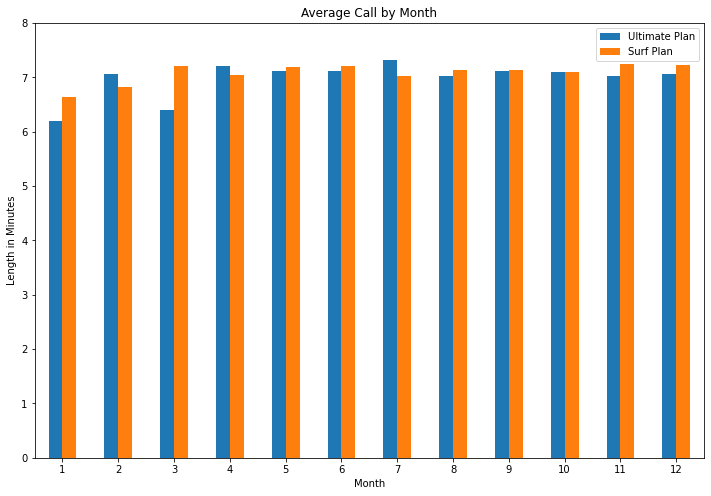

In [37]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_monthly = calls_df.groupby(by=['user_id', calls_df.call_date.dt.month])['billable'].mean().reset_index()
avg_monthly = avg_monthly.rename(columns = {'call_date': 'month', 'billable': 'avg_call'})
ult_avg_monthly = avg_monthly.query("user_id in @ult_user_usage['user_id']")
surf_avg_monthly = avg_monthly.query("user_id in @surf_user_usage['user_id']")

ult_avg_monthly = ult_avg_monthly.groupby('month')['avg_call'].mean().reset_index()
ult_avg_monthly = ult_avg_monthly.rename(columns = {'avg_call': 'ultimate'})
surf_avg_monthly = surf_avg_monthly.groupby('month')['avg_call'].mean().reset_index()
surf_avg_monthly = surf_avg_monthly.rename(columns = {'avg_call': 'surf'})

monthly_call_avg = ult_avg_monthly.merge(surf_avg_monthly, on='month')

monthly_call_avg.plot(kind = 'bar',
                     x = 'month',
                     title= 'Average Call by Month',
                     xlabel = 'Month',
                     ylabel = 'Length in Minutes',
                     ylim = [0,8],
                     figsize = [12,8]
                     
                    )
plt.legend(['Ultimate Plan', 'Surf Plan'])
plt.xticks(rotation=0)
plt.show()

Average call length doesn't differ greatly by plan - the greatest difference occurs in the month of March, but only by what appears to be a fraction of a minute. Without having multiple years to compare, it cannot be determined if there is a trend here between plan users and average call length in March.

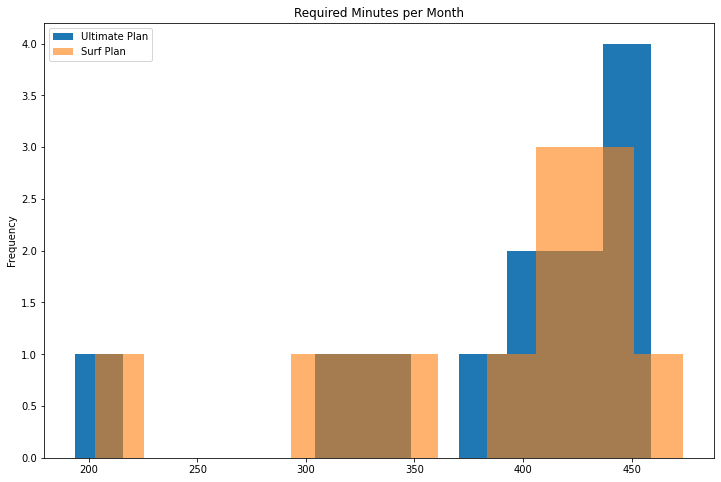

In [38]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
ult_monthly_min_avg = ult_user_usage.groupby(['month']).agg({'call_minutes' : 'mean'}).reset_index()
surf_monthly_min_avg = surf_user_usage.groupby(['month']).agg({'call_minutes' : 'mean'}).reset_index()
ult_monthly_min_avg = ult_monthly_min_avg.rename(columns = {'call_minutes': 'ultimate'})
surf_monthly_min_avg = surf_monthly_min_avg.rename(columns = {'call_minutes': 'surf'})
monthly_min_avg = ult_monthly_min_avg.merge(surf_monthly_min_avg, on='month')

monthly_min_avg['ultimate'].plot(kind = 'hist',
                                 figsize = [12,8],
                                 bins = 12,
                                )

monthly_min_avg['surf'].plot(kind = 'hist',
                             alpha = 0.6,
                             bins = 12
                            )
plt.legend(['Ultimate Plan', 'Surf Plan'])
plt.title('Required Minutes per Month')
plt.show()


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Adding titles to your graphs is important for providing context for the users so they understand what they are looking at. Together with for example legends and axis labels this is important to support unambiguous interpretation of displayed information.

You can do that by adding: 
    
    plt.title('...')

Can you please add them to your graphs?

<div class="alert alert-info"> <b>Student comments:</b> 
    
Added in the title. I thought I got them all displaying nicely with everything needed, but clearly not.</div> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
Thank you for updating all your graphs! 

The minutes per plan is quite similar between the two plans, with the biggest bulk for each of the two occuring between approximately 375 and 475 minutes, and fewer months that require 375 and less minutes.

In [39]:
# Calculate the mean and the variance of the monthly call duration

id_plan = users_df[['user_id', 'plan']]

calls_avg = calls_df.merge(id_plan)
calls_avg = calls_avg.rename(columns = {'call_date':'month'})
calls_avg['month'] = calls_avg['month'].dt.month

calls_avg_surf = calls_avg.query("plan == 'surf'")
calls_avg_surf = calls_avg_surf.groupby('month')['duration'].agg(['mean', 'var']).reset_index()
calls_avg_surf = calls_avg_surf.rename(columns={'call_date' : 'month', 'var' : 'surf_variance', 'mean' : 'surf_mean'})
calls_avg_ult = calls_avg.query("plan == 'ultimate'")
calls_avg_ult = calls_avg_ult.groupby('month')['duration'].agg(['mean', 'var']).reset_index()
calls_avg_ult = calls_avg_ult.rename(columns={'call_date' : 'month', 'var' : 'ultimate_variance', 'mean' : 'ultimate_mean'})
calls_avg_var = calls_avg_surf.merge(calls_avg_ult)

display(calls_avg_var)

,month,surf_mean,surf_variance,ultimate_mean,ultimate_variance
0,1,6.428000,28.208311,6.541518,35.442188
1,2,6.906175,35.218169,6.517230,33.688628
2,3,6.696919,32.393177,6.210906,32.882171
3,4,6.799918,33.406473,6.659990,32.071262
4,5,6.769200,34.617366,6.662443,34.371065
5,6,6.846812,35.141490,6.705188,33.435551
6,7,6.721710,33.461154,6.879085,34.567847
7,8,6.726164,33.951388,6.613484,33.681555
8,9,6.728684,34.649189,6.770040,34.019359
9,10,6.722302,33.793825,6.665850,34.206399


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
It's great that you managed to calculate all the necessary metrics and display them.

There is also a way to display all statistical metrics in one table (you can pass all metrics to aggfunc at once.), using, for example, pivot_table:

`data.pivot_table(index= 'tariff', values= '...', aggfunc= ['mean', 'var','std', 'median'])`

<div class="alert alert-info"> <b>Student comments:</b> 
    
That would have been a bit cleaner to do. As I mentioned above, I need more pivot table practice. Using them more often will certainly help me with more efficient coding.</div> 

Comparing the two plans numerically, the means and variances aren't that different. However, even though the averages of the two plans month-to-month are quite close, there are more months where the surf plan is actually higher than the ultimate plan, which is counter-intuitive as the untilmate plan has more included minutes, and the charge for minutes over is one-third that of the surf plan.

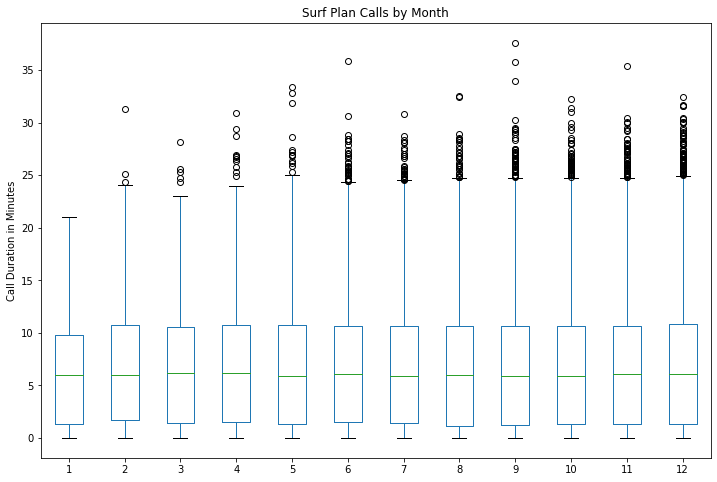

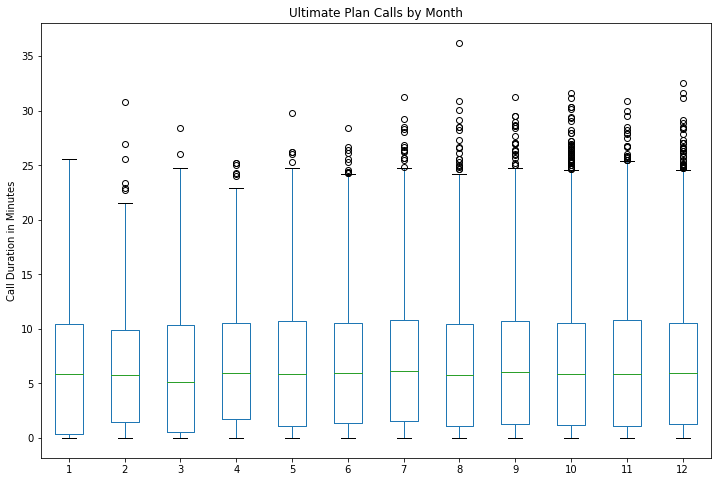

In [40]:
# Plot a boxplot to visualize the distribution of the monthly call duration

calls_surf = calls_avg.query("plan == 'surf'")
calls_surf = calls_surf[['month', 'duration']]
calls_ult = calls_avg.query("plan == 'ultimate'")
calls_ult = calls_ult[['month', 'duration']]

calls_surf = calls_surf.pivot(columns='month', values='duration')
calls_ult = calls_ult.pivot(columns='month', values='duration')

calls_surf.plot(kind='box', figsize=[12,8], title='Surf Plan Calls by Month', ylabel='Call Duration in Minutes')
calls_ult.plot(kind='box', figsize=[12,8], title='Ultimate Plan Calls by Month', ylabel='Call Duration in Minutes')


plt.show()

The array of monthly call durations plotted for each of the plans are quite similar. There doesn't appear to be a trend of longer talks for those with either plan, as the averages and quartile ranges don't differ from one another greatly.

**Calls Conclusion**

There doesn't appear to be a significance difference between the call behavior of users of each plan. As a whole, the average call length, the number of minutes used, and the duration of calls, when observed for each month and compared by plan were quite similar.

### Messages

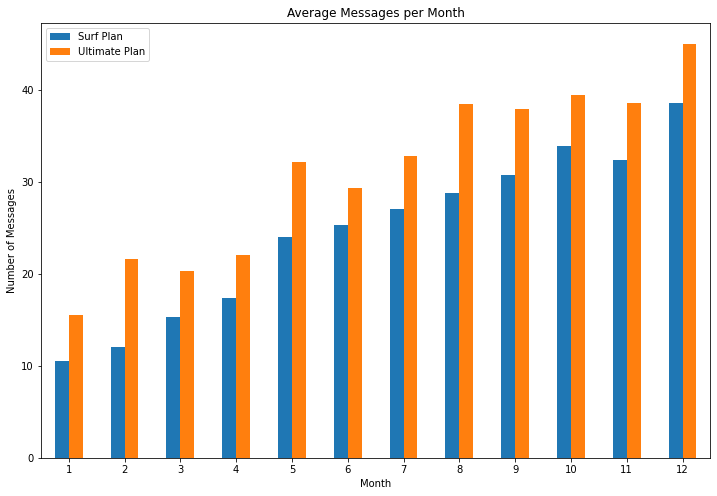

In [41]:
# Compare the number of messages users of each plan tend to send each month

messages_month_surf = surf_user_usage[['month', 'message_count']]
messages_month_surf = messages_month_surf.rename(columns = {'message_count' : 'surf_messages'})
messages_month_ult = ult_user_usage[['month', 'message_count']]
messages_month_ult = messages_month_ult.rename(columns = {'message_count' : 'ultimate_messages'})

messages_avg_surf = messages_month_surf.groupby('month').mean().reset_index()
messages_avg_ult = messages_month_ult.groupby('month').mean().reset_index()

messages_avg_month = messages_avg_surf.merge(messages_avg_ult, on='month')

messages_avg_month.plot(kind='bar',
                        x='month',
                        figsize=[12,8],
                        xlabel='Month',
                        ylabel='Number of Messages',
                        title='Average Messages per Month'
                       )

plt.legend(['Surf Plan', 'Ultimate Plan'])
plt.xticks(rotation=0)
plt.show()

On average, users of the Ultimate Plan send more texts each month than users of the Surf Plan.

In [42]:
# Calculate the mean and the variance of the monthly messages for each plan

messages_avgvar_surf = messages_month_surf.groupby('month').agg(['mean' , 'var']).reset_index()
messages_avgvar_surf = messages_avgvar_surf.rename(columns = {'mean' : 'surf_mean', 'var' : 'surf_variance'})
messages_avgvar_ult = messages_month_ult.groupby('month').agg(['mean' , 'var']).reset_index()
messages_avgvar_ult = messages_avgvar_ult.rename(columns = {'mean' : 'ultimate_mean', 'var' : 'ultimate_variance'})
messages_avgvar = messages_avgvar_surf.merge(messages_avgvar_ult)

display(messages_avgvar)

month surf_messages               ultimate_messages                  
             surf_mean surf_variance     ultimate_mean ultimate_variance
0      1     10.500000    220.500000         15.500000        313.666667
1      2     12.000000    386.000000         21.571429        478.285714
2      3     15.260870    346.565217         20.250000        654.386364
3      4     17.400000    501.591837         22.047619        544.147619
4      5     24.012987    847.197198         32.103448       1297.310345
5      6     25.298969    914.920103         29.340426        857.620722
6      7     27.033058    923.915565         32.830508        960.488019
7      8     28.777778   1029.515528         38.478873       1196.367404
8      9     30.762887   1003.829496         37.895349       1050.918331
9     10     33.839662   1275.465708         39.443396       1221.106289
10    11     32.385159   1065.344034         38.606299       1232.669166
11    12     38.600629   1458.158612         45.006623       1549.419956

Unlike with the calls, the users of the Ultimate plan can be seen to text more than those of the Surf plan. The variance is also generally higher for those of the Ultimate plan than those of the Surf plan, which indicates there is a wider range of texts per month for those users.

<AxesSubplot:title={'center':'Ultimate Plan Messages by Month'}, ylabel='Nummer of Messages'>

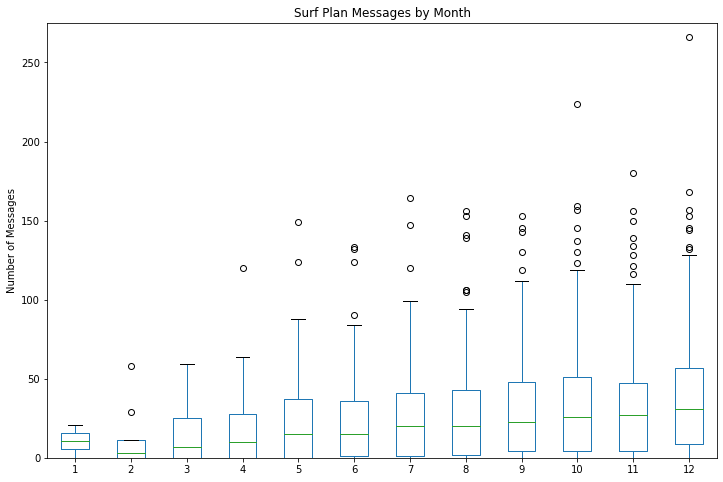

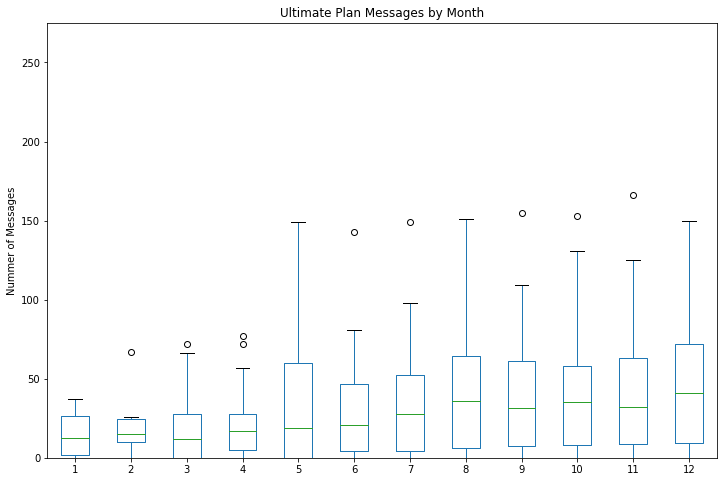

In [43]:
# Plot a boxplot to visualize the distribution of the monthly messages between each plan

surf_messages = surf_user_usage[['user_id', 'month', 'message_count']]
ult_messages = ult_user_usage[['user_id', 'month', 'message_count']]

surf_messages = surf_messages.pivot(index = 'user_id', columns = 'month', values = 'message_count')
ult_messages = ult_messages.pivot(index = 'user_id', columns = 'month', values = 'message_count')

surf_messages.plot(kind='box', figsize=[12,8], title='Surf Plan Messages by Month', ylabel='Number of Messages', ylim=[0,275])
ult_messages.plot(kind='box', figsize=[12,8], title='Ultimate Plan Messages by Month', ylabel='Nummer of Messages', ylim=[0,275])

Comparing the two plans together it can be seen that none of the users of the Ultimate plan went over on their monthly number of minutes (300). However, Surf users regularly pay overage charges for messages over the limit (50) - this is demonstrated by both the number of outliers which represent a minimal percentage of users, and all but two of the month including the 50 message mark in their quartile range.

**Messages Conclusion**

Those users with the Ultimate plan tended to use their messaging service more, however due to the lower limit before additional charges and higher charges per message over the limit, the Surf plan users likely had to pay more addional fees.

### Internet

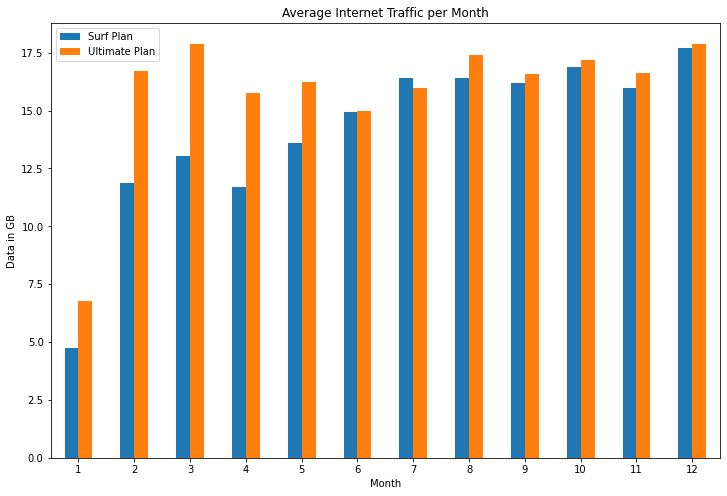

In [44]:
# Compare the amount of internet traffic consumed by users per plan

internet_month_surf = surf_user_usage[['month', 'mb_used']]
internet_month_surf = internet_month_surf.rename(columns = {'message_count' : 'surf_messages'})
internet_month_ult = ult_user_usage[['month', 'mb_used']]
internet_month_ult = internet_month_ult.rename(columns = {'message_count' : 'ultimate_messages'})

internet_month_surf['mb_used'] = internet_month_surf['mb_used'].div(1024)
internet_month_ult['mb_used'] = internet_month_ult['mb_used'].div(1024)
internet_month_surf = internet_month_surf.rename(columns = {'mb_used' : 'gb_used'})
internet_month_ult = internet_month_ult.rename(columns = {'mb_used' : 'gb_used'})

internet_avg_surf = internet_month_surf.groupby('month').mean().reset_index()
internet_avg_ult = internet_month_ult.groupby('month').mean().reset_index()

internet_avg_month = internet_avg_surf.merge(internet_avg_ult, on='month')

internet_avg_month.plot(kind='bar',
                        x='month',
                        figsize=[12,8],
                        xlabel='Month',
                        ylabel='Data in GB',
                        title='Average Internet Traffic per Month'
                       )

plt.legend(['Surf Plan', 'Ultimate Plan'])
plt.xticks(rotation=0)
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
This whole section is a great possibility to create one function to automate your code.

<div class="alert alert-info"> <b>Student comments:</b> 
    
Yes. When I was copying and pasting my code and making alterations, the third time I was doing it I was quietly chewing myself out for opting for the inefficient way. At that point it would have take more work to go back and adjust, rather than finish it up. Next time something like this comes up, I'll be relying on functions more as I made more work for myself than necessary in this section.</div> 

Outside of January through May, the average amount of internet traffic used between plans is quite comperable. Also, it i likely that nearly half of the users of the Surf plan played overage charges for their internet starting in June, as their limit is 15 GB.

In [45]:
# Calculate the mean and the variance of the monthly internet traffic for each plan

internet_avgvar_surf = internet_month_surf.groupby('month').agg(['mean' , 'var']).reset_index()
internet_avgvar_surf = internet_avgvar_surf.rename(columns = {'mean' : 'surf_mean', 'var' : 'surf_variance'})
internet_avgvar_ult = internet_month_ult.groupby('month').agg(['mean' , 'var']).reset_index()
internet_avgvar_ult = internet_avgvar_ult.rename(columns = {'mean' : 'ultimate_mean', 'var' : 'ultimate_variance'})
internet_avgvar = messages_avgvar_surf.merge(internet_avgvar_ult)

display(internet_avgvar)

month surf_messages                     gb_used                  
             surf_mean surf_variance ultimate_mean ultimate_variance
0      1     10.500000    220.500000      6.755950         15.635216
1      2     12.000000    386.000000     16.727352         35.904976
2      3     15.260870    346.565217     17.892108        133.837858
3      4     17.400000    501.591837     15.743803         84.332091
4      5     24.012987    847.197198     16.234846         54.159275
5      6     25.298969    914.920103     14.978439         68.678409
6      7     27.033058    923.915565     15.961664         65.249644
7      8     28.777778   1029.515528     17.397188         57.646831
8      9     30.762887   1003.829496     16.572138         47.053374
9     10     33.839662   1275.465708     17.199759         54.354932
10    11     32.385159   1065.344034     16.634458         54.921606
11    12     38.600629   1458.158612     17.893742         59.014608

/tmp/ipykernel_113/902706378.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surf_internet['mb_used'] = surf_internet['mb_used'].div(1024)
/tmp/ipykernel_113/902706378.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ult_internet['mb_used'] = ult_internet['mb_used'].div(1024)


<AxesSubplot:title={'center':'Ultimate Plan Internet by Month'}, ylabel='GB Used'>

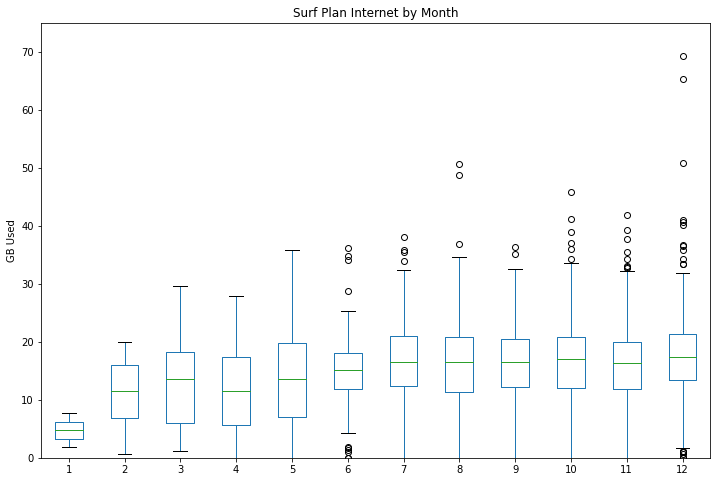

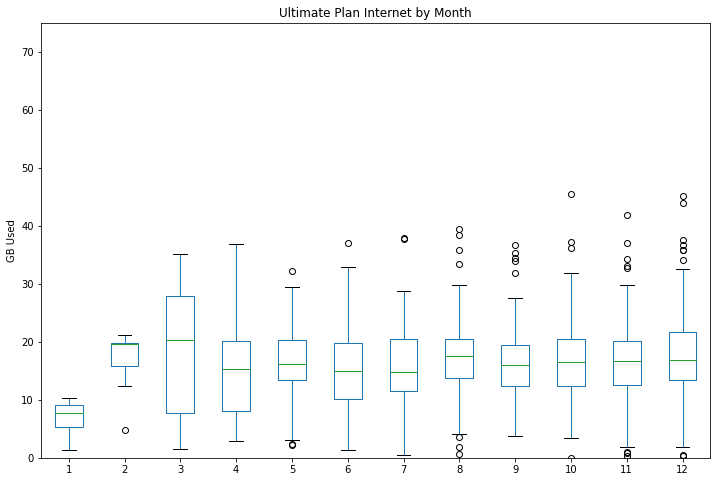

In [46]:
# Plot a boxplot to visualize the distribution of the monthly internet traffic between each plan

surf_internet = surf_user_usage[['user_id', 'month', 'mb_used']]
ult_internet = ult_user_usage[['user_id', 'month', 'mb_used']]

surf_internet['mb_used'] = surf_internet['mb_used'].div(1024)
ult_internet['mb_used'] = ult_internet['mb_used'].div(1024)
surf_internet = surf_internet.rename(columns = {'mb_used' : 'gb_used'})
ult_internet = ult_internet.rename(columns = {'mb_used' : 'gb_used'})

surf_internet = surf_internet.pivot(index = 'user_id', columns = 'month', values = 'gb_used')
ult_internet = ult_internet.pivot(index = 'user_id', columns = 'month', values = 'gb_used')

surf_internet.plot(kind='box', figsize=[12,8], title='Surf Plan Internet by Month', ylabel='GB Used', ylim = [0,75])
ult_internet.plot(kind='box', figsize=[12,8], title='Ultimate Plan Internet by Month', ylabel='GB Used', ylim = [0,75])

As seen in the box plots above, there were much fewer overage charges for the users of the Ultimate plan proportionally when compared to the Surf plan. Just as was stated below the bar chart of average internet usage comparing the two plans, starting in June, nearly half of Surf plan users payed overages on Internet usage. While there were no months that a majority of Ultimate plan customers when over their limit of 30 GB.

**Internet Conclusion**

During the first half of the year, the internet traffic of users of the Ultimate plan exceeded that of those with the Surf plan. However, in June, the internet usage between users of the two plans became more similar. Due to the limits before overage charges, it is likely that more overage charges were collected from users who had the Surf plan, both due to the higher cost of additional GB (\\$10 per GB over for the Surf plan versus \\$7 for the Ultimate plan), and because of the lower limit before addional charges with the Surf plan.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

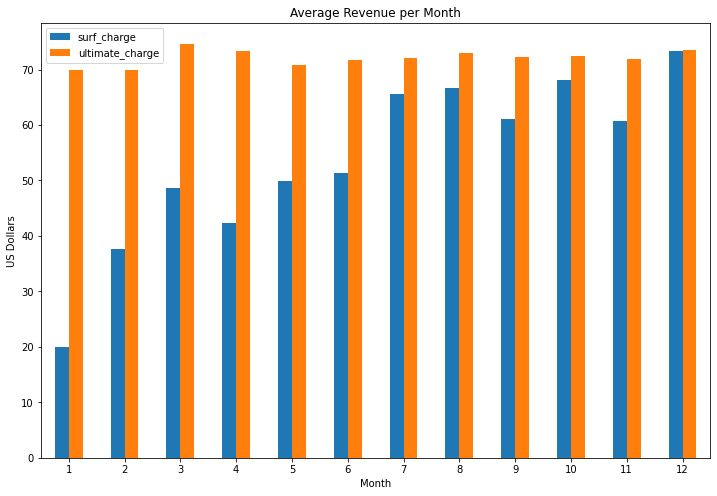

In [47]:
# Compare the amount of revenue by users per plan

revenue_month_surf = surf_user_usage[['month', 'charge']]
revenue_month_ult = ult_user_usage[['month', 'charge']]

revenue_month_surf = revenue_month_surf.rename(columns={'charge' : 'surf_charge'})
revenue_month_ult = revenue_month_ult.rename(columns={'charge' : 'ultimate_charge'})

revenue_avg_surf = revenue_month_surf.groupby('month').mean().reset_index()
revenue_avg_ult = revenue_month_ult.groupby('month').mean().reset_index()

revenue_avg_month = revenue_avg_surf.merge(revenue_avg_ult, on='month')

revenue_avg_month.plot(kind='bar',
                        x='month',
                        figsize=[12,8],
                        xlabel='Month',
                        ylabel='US Dollars',
                        title='Average Revenue per Month'
                       )


plt.xticks(rotation=0)
plt.show()


In [48]:
# Calculate the mean and the variance of the monthly revenue for each plan

revenue_avgvar_surf = revenue_month_surf.groupby('month').agg(['mean' , 'var']).reset_index()
revenue_avgvar_surf = revenue_avgvar_surf.rename(columns = {'mean' : 'surf_mean', 'var' : 'surf_variance'})
revenue_avgvar_ult = revenue_month_ult.groupby('month').agg(['mean' , 'var']).reset_index()
revenue_avgvar_ult = revenue_avgvar_ult.rename(columns = {'mean' : 'ultimate_mean', 'var' : 'ultimate_variance'})
revenue_avgvar = revenue_avgvar_surf.merge(revenue_avgvar_ult)

display(revenue_avgvar)

month surf_charge               ultimate_charge                  
           surf_mean surf_variance   ultimate_mean ultimate_variance
0      1   20.000000      0.000000       70.000000          0.000000
1      2   37.730000    520.301100       70.000000          0.000000
2      3   48.550000   1717.674500       74.666667        145.515152
3      4   42.310600   1358.821749       73.333333        154.933333
4      5   49.965844   2178.183151       70.724138         15.206897
5      6   51.338144   2101.904811       71.787234         81.953747
6      7   65.649256   3169.123492       72.135593        132.222677
7      8   66.647222   3838.469474       73.056338        169.025352
8      9   61.003454   2402.306520       72.197674         86.772230
9     10   68.079451   3328.274709       72.509434        187.776101
10    11   60.795795   2666.722457       71.874016        109.237970
11    12   73.261447   4706.209916       73.569536        241.646799

Based on the means for the users for the Surf, a majority of users regularly pay overage charges raising the revenue from those contracts above the base $20. The users of the Ultimate plan however, didn't frequently exceed thier limits causing overage charges.

<AxesSubplot:title={'center':'Ultimate Plan Revenue by Month'}, ylabel='US Dollars'>

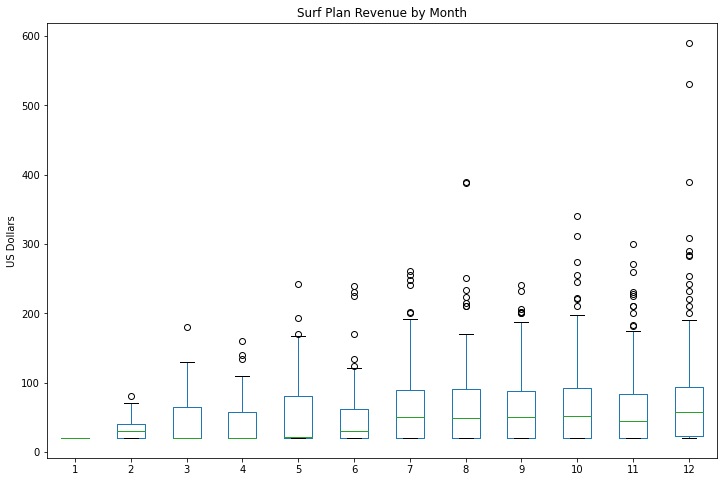

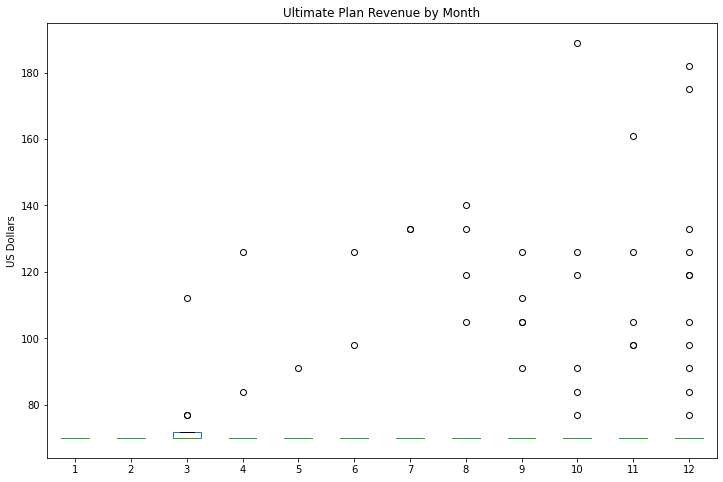

In [49]:
# Plot a boxplot to visualize the distribution of the monthly revenue between each plan

surf_revenue = surf_user_usage[['user_id', 'month', 'charge']]
ult_revenue = ult_user_usage[['user_id', 'month', 'charge']]

surf_revenue = surf_revenue.pivot(index = 'user_id', columns = 'month', values = 'charge')
ult_revenue = ult_revenue.pivot(index = 'user_id', columns = 'month', values = 'charge')

surf_revenue.plot(kind='box', figsize=[12,8], title='Surf Plan Revenue by Month', ylabel='US Dollars')
ult_revenue.plot(kind='box', figsize=[12,8], title='Ultimate Plan Revenue by Month', ylabel='US Dollars')

The box plots confirm our previous conclusions drawn. For all but one month, only outliers of the users of the Ultimate plan paid more than a few dollars over their \\$70 base fee if over at all. While users of the Surf plan consistently paid over, as in all but one month, the quartile ranges extended past the \\$20 base fee.

**Revenue Conclusion**

Per user, more revenue was collected from those who had the Ultimate plan on average, however, more additional fees for minutes, messages, and GB of data use was collected from the users of the Surf plan. Outside of the month of March, the only noticible payments significantly higher than the \\$70 plan fee are statistical outliers. While with the users of the Surf plan, there were significant numbers of users over the \\$20 base fee with January being the only exception. 

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. Great that you used different graph types to check available data.
- Great that you managed to add both plans on one graph. 
- If you have time and willing to practice, you can display two charts (histogram and a box plot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

<div class="alert alert-info"> <b>Student comments:</b> 
    
I've been getting more comfortable with plotting, so I've made a note of this code to play around with when I get the time. By your description, and what I'm gathering from the actual lines of code, it looks like it could be a very useful tool. I appreciate the guidance greatly.</div> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
👏

## Test statistical hypotheses

**Null Hypothesis:** The average revenue from users of the Ultimate calling plan does not differ greatly from that of the Surf calling plan.

**Alternative Hypothesis:** The average revenue from users of the Ultimate calling plan differs greatly from that of the Surf calling plan.

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Unfortunately, there is an issue in formulating null and alternative hypotheses.
A null hypothesis is a type of hypothesis used in statistics that proposes that there is no difference between certain characteristics of a population. An alternative hypothesis always contradicts the null one.
Can you please update that? 

In [50]:
# Test the hypotheses
surf_avg_revenue = surf_user_usage['charge'].mean()
ult_avg_revenue = ult_user_usage['charge'].mean()

surf_charges = surf_user_usage['charge'].astype('float')
ult_charges = ult_user_usage['charge'].astype('float')

results_surf = st.ttest_1samp(surf_charges, ult_avg_revenue)
results_ult = st.ttest_1samp(ult_charges, surf_avg_revenue)

alpha = 0.001

print('p-value: ', results_surf.pvalue)

if results_surf.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  2.140240778412559e-10
We reject the null hypothesis


Based on a crititical statistical significance level, or alpha, of 0.1%, the null hypothesis that "The average revenue from users of the Ultimate calling plan does not differ greatly from that of the Surf calling plan" is rejected, meaning we assume the alternative hypothesis that "The average revenue from users of the Ultimate calling plan differs greatly from that of the Surf calling plan" is correct until disproven.

**Null Hypothesis:** The average revenue from users in the NY-NJ area is not different from that of the users of other regions.

**Alternative Hypothesis:** The average revenue from users in the NY-NJ area is different from that of users in other regions.

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
The same comment as above.

<div class="alert alert-info"> <b>Student comments:</b> 
    
I believe I corrected the two hypotheses, their tests remained the same, but I adjusted the conclusions to reflect as well. A simple explanation of nall hypothesis having no difference was either not in the lesson, or I completely missed it, but it is a very easy way of keeping it straight in my head, so thank you so much for stating it that way.</div> 

In [51]:
# Test the hypotheses

users_loc = users_df[['user_id', 'city']]
users_charge = user_usage[['user_id', 'month', 'charge']]
users_charge_loc = users_charge.merge(users_loc, on='user_id')

nynj_mask = users_charge_loc['city'].str.contains(('NY') or ('NJ'))
users_nynj = users_charge_loc[nynj_mask]
other_mask = ~nynj_mask
users_other = users_charge_loc[other_mask]

other_avg = users_other['charge'].mean()
nynj_revenue = users_nynj['charge']

results = st.ttest_1samp(nynj_revenue, other_avg)

alpha = 0.01

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  0.1281616422222341
We can't reject the null hypothesis


Based on a crititical statistical significance level, or alpha, of 1%, the null hypothesis that "The average revenue from users in the NY-NJ area is not different from that of the users of other regions" cannot be rejected, thus it is assumed to be correct until it is proven otherwise, meaning we reject the alternative hypothesis that "The average revenue from users in the NY-NJ area is different from that of users in other regions."

Even increasing the critical statistical significance level, or alpha, to 10%, we would still get the same result.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
Your results and hypotheses are correct now.  
    
You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)

## General conclusion


**Regarding individual aspects of the two plans:**

- Users with both the Ultimate and Surf plans displayed similar behavior in the use of their calling minutes, both in average duration of calls, and required minutes per month. Because of the higher threshold before additional fees, and because of the higher cost of additional minutes, it is likely that there is more revenue gain from additional minutes gathered from users of the Surf plan.
- Where messages were concerned, users with the Ultimate plan used the service more than their counterparts with the Surf plan. However, much like with minutes, because of the lower threshold before additional charges per message, and the price per message differential, it is likely that per user, more additional revenue beyond the cost of the plan was gained from Surf plan users.
- In the second half of the year, starting in June, the average internet usage between users of both plans. The first half of the year showed less usage from those users with the Surf plan - this may be caused by the users included in the sample data, or could be a trend. Further anaysis of more and/or larger samples could confirm or refute this theory. However, much the same as with talking minutes, and messages, it is likely that more additional revenue beyond the cost of the plan was gathered from those users with the Surf plan. Again, much like before, this is due to the lower threshold before additional charges, and the higher cost per gigabyte for the Surf plan when compared to the Ultimate plan.

**Regarding revenue analysis**

Per user, more revenue was collected from users of the Ultimate plan than those of the Surf plan - this can be contributed to the higher base cost (\\$70 for the Ultimate plan vs \\$20 for the Surf plan, monthly). However, just as was mentioned above in regards to the minutes, messages, and internet usage, more additional charges were collected from users of the Surf plan. This can be contributed to both the lower thresholds of the Surf plan before additional charges, and the higher cost for those additional minutes, messages, and gigabytes of internet.

Upon comparing revenue gained from both plans, it was determined that our alternative hypothesis of "The average revenue from users of the Ultimate calling plan does differ greatly from that of the Surf calling plan" was accepted where the null hypothesis was rejected. This anaysis was done with a very stringent 0.1% critical statistical significance level indicating that 0.1% of the time, the conclusion from the hypothesis would be rejected or accepted wrongly.

This being the case, there is a difference in which plan earns more. With more analysis, we could determine which provideds higher revenue such as a one-tailed hypothesis test comparing the two plans.

**Regarding location**

A single analysis was done comparing the average revenue of those in the New York/New Jersey region compared to everywhere else. The conclusion resulted in the null hypothesis not being rejected, which stated, "The average revenue from users in the NY-NJ area is not different from that of the users of other regions." More and/or larger samples of analysis, along with comparison to other specific regions such as Dallas-Ft. Worth, Minneapolis-St. Paul, or Los Angeles for example could indicate a trend on revenue per user when compared to other metropolitan areas. This hypothesis was tested with a critical statistical significance level of 1%, indicating that the hypothesis would be wrongly rejected or not rejected only 1% of the time.

**Additional analysis**

Based on the information gathered through this preliminary analysis of 500 Megaline users, some more focused analysis into overage charges of minutes, messages, and internet could be conducted. Regional studies to see similarities and differences in use in different regions and in different population densities may also provide additional information that would be useful in both marketing and physical store locations. Because of the high frequency of Surf customers going over their limits, analysis of these could also guide the creation of a third plan in the middle that would have a higher base cost than Surf and lower than that of the Ultimate plan with minutes, message, and internet threshold in between the two. Such a plan could provide more base income than that of the Surf plan, but still have the potential to garner additional revenue from overage charges.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- You conducted an outstanding research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusion. It is very structured and provides insights and recommendations to the business.

<div class="alert alert-info"> <b>Student comments:</b> 
    
I made some adjustments to reflect the altered hypotheses, and corrected a couple spelling errors I caught. I appreciate the feedback greatly along with the different methods of completing tasks more efficiently when you saw them. I believe you handled my Sprint 1 project as well, and I greatly appreciate the time you have spent to look through my (often messy) code and the feedback you provide.</div> 

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v2:</b>
    
I'm glad that you found the feedback helpful and that you were able to make adjustments to your project based on it. It's great to hear that you also found my suggestions for completing tasks more efficiently useful. I am also glad that you found my feedback valuable for your sprint 1 project. I am happy to provide guidance and support as you work on your projects, and I look forward to seeing the progress you make in the future 😇 If you have any further questions or need help with anything else, please let me know.